<center>
<h4>Universidad Nacional de Córdoba - Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h4>
<h3> Análisis y Visualización de Datos </h3>
</center>


# Distribuciones

En esta notebook vamos a ver cómo graficar las funciones de probabilidad y de densidad de distintas variables aleatorias en nuestro dataset.

In [1]:
import matplotlib.pyplot as plt
import pandas
import seaborn
import numpy

print(seaborn.__version__)
print(numpy.__version__)

0.9.0
1.18.1


In [2]:
df = pandas.read_csv('C:/Users/W10/Documents/Vero-Data Science/AnalisisyVisualizacion/Dataset.csv')
df.columns = ['timestamp', 'gender', 'age', 'zodiac_sign', 'profession',
              'junior_programmer_salary', 'senior_programmer_salary']
df[:3]

,timestamp,gender,age,zodiac_sign,profession,junior_programmer_salary,senior_programmer_salary
0,31/03/2020 17:10:01,Mujer,27,Tauro,Programadora,40000.0,80000.0
1,12/05/2020 15:19:14,Mujer,40,Acuario,Docente investigadora,50000.0,90000.0
2,13/05/2020 13:43:48,Hombre,22,Géminis,Estudiante de Astronomía,25000.0,60000.0


## Funciones de densidad

Vimos en el teórico los conceptos de funciones de densidad y cómo varían según el tipo de datos. A pesar de que estos conceptos son muy similares, la hora de visualizarlos, tenemos que usar herramientas muy distintas.



### Densidad de probabilidad de variables categóricas

Ya vimos anteriormente cómo calcular esta probabilidad y cómo representarla usando gráficos de barra. Los gráficos de linea o gráficos de puntos no son apropiados porque implican secuencialidad en los datos.

Esta es otra manera de calcular la densidad de probabilidad:


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

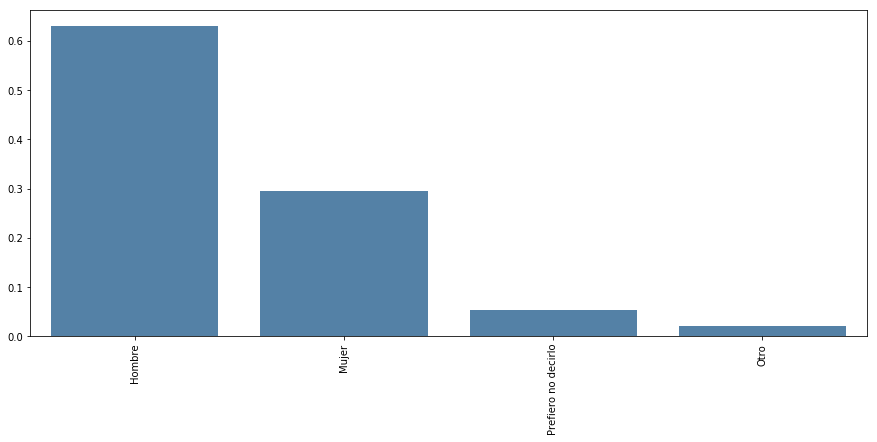

In [3]:
data = df.gender.value_counts(normalize=True)
plt.figure(figsize=(15, 6))
seaborn.barplot(x=data.index, y=data.values, color='steelblue')
plt.xticks(rotation=90)

Pongamos las cosas en proporción. Muchas veces cambiar los ejes de los gráficos produce resultados muy distintos

(0, 1)

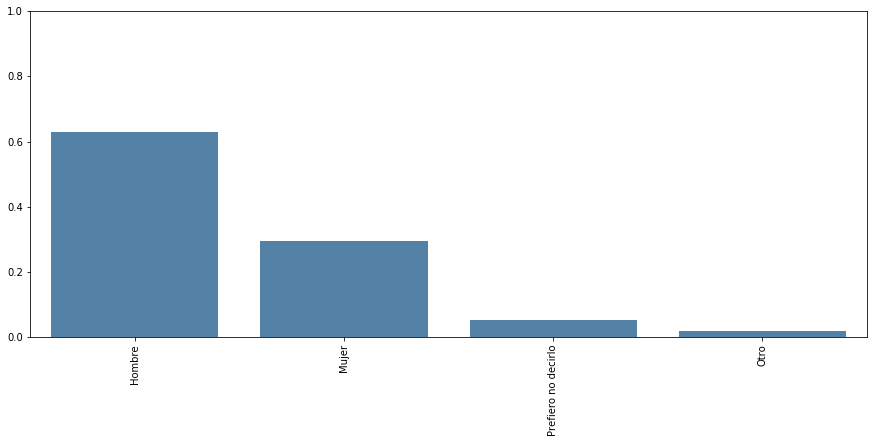

In [4]:
data = df.gender.value_counts(normalize=True)
plt.figure(figsize=(15, 6))
seaborn.barplot(x=data.index, y=data.values, color='steelblue')
plt.xticks(rotation=90)
plt.ylim(0, 1)

### Densidad de probabilidad para variables numéricas discretas

En el caso de las variables numéricas y ordinales, se pueden usar tanto gráficos de barra como gráficos de línea. Veamos que resultado podemos obtener

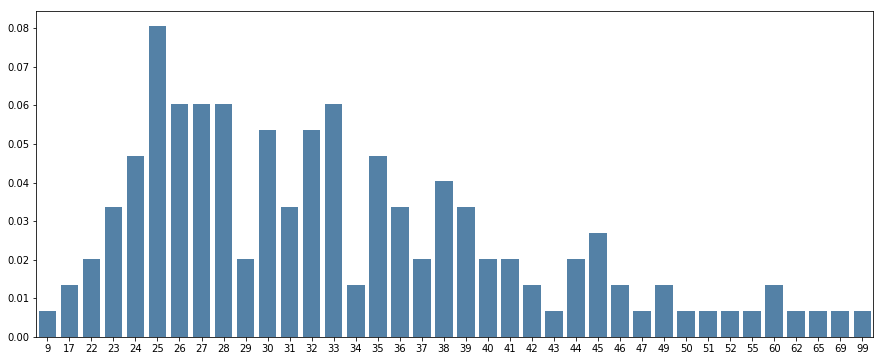

In [5]:
data = df.age.value_counts(normalize=True)
plt.figure(figsize=(15, 6))
seaborn.barplot(x=data.index, y=data.values, color='steelblue')

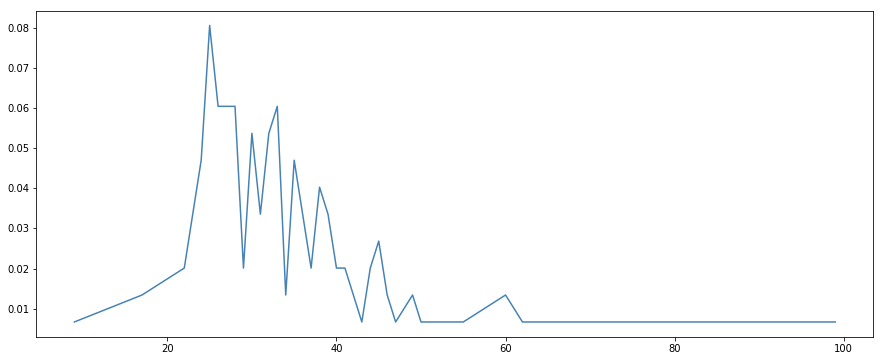

In [6]:
data = df.age.value_counts(normalize=True)
plt.figure(figsize=(15, 6))
seaborn.lineplot(x=data.index, y=data.values, color='steelblue')

En ambos gráficos, ¿están todos los valores representados? ¿qué sucedió con los valores faltantes? ¿Podríamos usar este tipo de gráfico si la variable pudiera tomar miles de valores posibles?

La forma más adecuada de representar esta infomación para variables numéricas es el **histograma**, que separa el rango completo de valores en contenedores (bins) ancho constante y cuenta cuántos ejemplos caen dentro de cada contenedor.

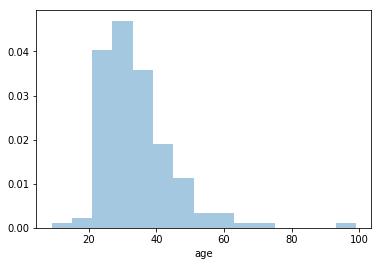

In [7]:
seaborn.distplot(df.age, bins=15, kde=False, norm_hist=True)  # Histograma con densidades

Por defecto, la función `seaborn.distplot` genera una estimación de la función de densidad. Esto se puede evitar con el parámetro `kde=False`, pero entonces producirá un histograma con frecuencias y no densidades, y por eso le agregamos `norm_hist=True`. Pueden probar las distintas combinaciones para ver qué sucede.

Una forma todavía más fácil es usando pandas mismo, pero el control sobre los elementos gráficos es menor:

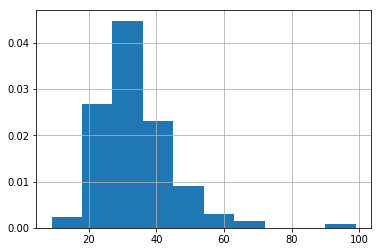

In [8]:
df.age.hist(density=1)

## Función de densidad acumulada

Pandas permite graficar la FDA de cualquier columna numérica:

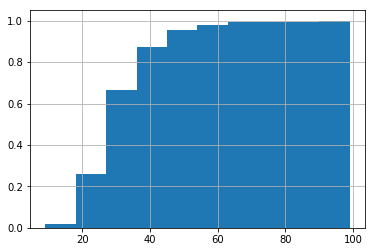

In [9]:
df.age.hist(cumulative=True, density=1)

Ejercicio opcional: Calcular manualmente la FDA de la columna age y graficarla usando seaborn.

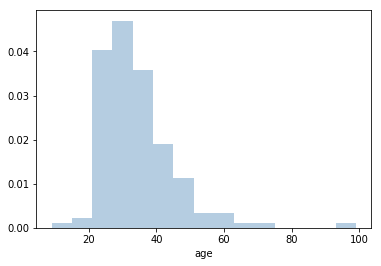

In [10]:
import seaborn
seaborn.distplot(df.age, bins=15, kde=False, norm_hist=True, color='steelblue')

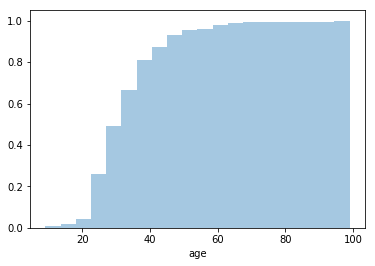

In [12]:
import numpy as np
import seaborn

cumulative = {'cumulative': True, 'density':True}
cumulative2 = {'cumulative': True}
seaborn.distplot(df.age, hist_kws=cumulative, kde_kws=cumulative2, kde=None)